# Project 01 - Team Gold

## Question 01 -
#### **Examine movie genres for possible favorites among the general public** (Joshua)

Visualizations -
1) upset plot of movie genres and box-office numbers
2) pie chart of movie genres by amount

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import upsetplot as uplt

# Importing the dataset

In [2]:
movies = pd.read_csv("Initial_Movie_Data_Dataframe.csv")
movies = movies.dropna(subset=["Movie Title","Box Office ($)"])
#movies.shape # (251, 7)
movies = movies.sort_values(by=["Genre"])
movies.head(10)

,Movie Title,Genre,Runtime (min),Box Office ($),Metacritic Rating,IMDb Rating,Release Year
421,The Chase,"Action, Adventure, Comedy",94 min,"$7,924,955",NaN,5.8,1994
717,Hit and Run,"Action, Adventure, Comedy",100 min,"$13,749,300",50.0,6.1,2012
674,The Losers,"Action, Adventure, Comedy",97 min,"$23,591,432",44.0,6.2,2010
642,It Shouldn't Happen to a Dog,"Action, Adventure, Comedy",70 min,"$800,000",NaN,6.5,1946
684,Radioactive Dreams,"Action, Adventure, Comedy",98 min,"$220,038",NaN,5.5,1984
563,Kingsman: The Golden Circle,"Action, Adventure, Comedy",141 min,"$100,234,838",44.0,6.7,2017
595,The Brothers Grimm,"Action, Adventure, Comedy",118 min,"$37,916,267",51.0,5.9,2005
162,The Chase,"Action, Adventure, Comedy",94 min,"$7,924,955",NaN,5.8,1994
391,"OSS 117: Cairo, Nest of Spies","Action, Adventure, Comedy",99 min,"$303,543",62.0,7.0,2006
320,Into the Storm,"Action, Adventure, Drama",89 min,"$47,615,959",44.0,5.8,2014


In [3]:
movies.shape

(326, 7)

## Upset plot 

In [4]:
boxOfficeNumbers = []
for i in movies["Box Office ($)"]:
    boxOfficeNumbers.append(int(i.strip().strip("$").replace(",","")))
movies["BoxOffice"] = boxOfficeNumbers
movies.head(10)

,Movie Title,Genre,Runtime (min),Box Office ($),Metacritic Rating,IMDb Rating,Release Year,BoxOffice
421,The Chase,"Action, Adventure, Comedy",94 min,"$7,924,955",NaN,5.8,1994,7924955
717,Hit and Run,"Action, Adventure, Comedy",100 min,"$13,749,300",50.0,6.1,2012,13749300
674,The Losers,"Action, Adventure, Comedy",97 min,"$23,591,432",44.0,6.2,2010,23591432
642,It Shouldn't Happen to a Dog,"Action, Adventure, Comedy",70 min,"$800,000",NaN,6.5,1946,800000
684,Radioactive Dreams,"Action, Adventure, Comedy",98 min,"$220,038",NaN,5.5,1984,220038
563,Kingsman: The Golden Circle,"Action, Adventure, Comedy",141 min,"$100,234,838",44.0,6.7,2017,100234838
595,The Brothers Grimm,"Action, Adventure, Comedy",118 min,"$37,916,267",51.0,5.9,2005,37916267
162,The Chase,"Action, Adventure, Comedy",94 min,"$7,924,955",NaN,5.8,1994,7924955
391,"OSS 117: Cairo, Nest of Spies","Action, Adventure, Comedy",99 min,"$303,543",62.0,7.0,2006,303543
320,Into the Storm,"Action, Adventure, Drama",89 min,"$47,615,959",44.0,5.8,2014,47615959


In [5]:
genres_list = []
for g in movies["Genre"]:
    g_list = g.strip().split(", ")
    if g_list not in genres_list:
        genres_list.append(g_list)
        

print(len(genres_list))

126


In [6]:
genres_list

[['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Horror'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Biography', 'Drama'],
 ['Action', 'Comedy'],
 ['Action', 'Comedy', 'Crime'],
 ['Action', 'Comedy', 'Sport'],
 ['Action', 'Comedy', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Crime', 'Thriller'],
 ['Action', 'Drama', 'Fantasy'],
 ['Action', 'Drama', 'Mystery'],
 ['Action', 'Drama', 'Romance'],
 ['Action', 'Drama', 'Sci-Fi'],
 ['Action', 'Drama', 'Sport'],
 ['Action', 'Drama', 'War'],
 ['Action', 'Fantasy', 'Horror'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Sci-Fi'],
 ['Action', 'Thriller'],
 ['Adult', 'Comedy', 'Drama'],
 ['Adventure', 'Biography', 'Drama'],
 ['Adventure', 'Comedy'],
 ['Adventure', 'Comedy', 'Crime'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Adventure', 'Comedy', 'Family'],
 ['Adventure', 'Comedy', 'Fantasy'],
 ['Adventure', 'Comed

In [7]:
movies_values = movies.groupby(["Genre"])[["BoxOffice"]].mean()
#movies_values

In [8]:
movies_values

,BoxOffice
Genre,
"Action, Adventure, Comedy",2.140726e+07
"Action, Adventure, Drama",3.296106e+07
"Action, Adventure, Fantasy",1.973110e+08
"Action, Adventure, Horror",7.308400e+07
"Action, Adventure, Sci-Fi",1.158757e+08
...,...
"Horror, Sci-Fi",2.879065e+07
"Horror, Sci-Fi, Thriller",5.383740e+06
"Horror, Thriller",8.296274e+06


In [9]:
genre_values = movies_values["BoxOffice"].to_list()

In [10]:
len(genre_values)

126

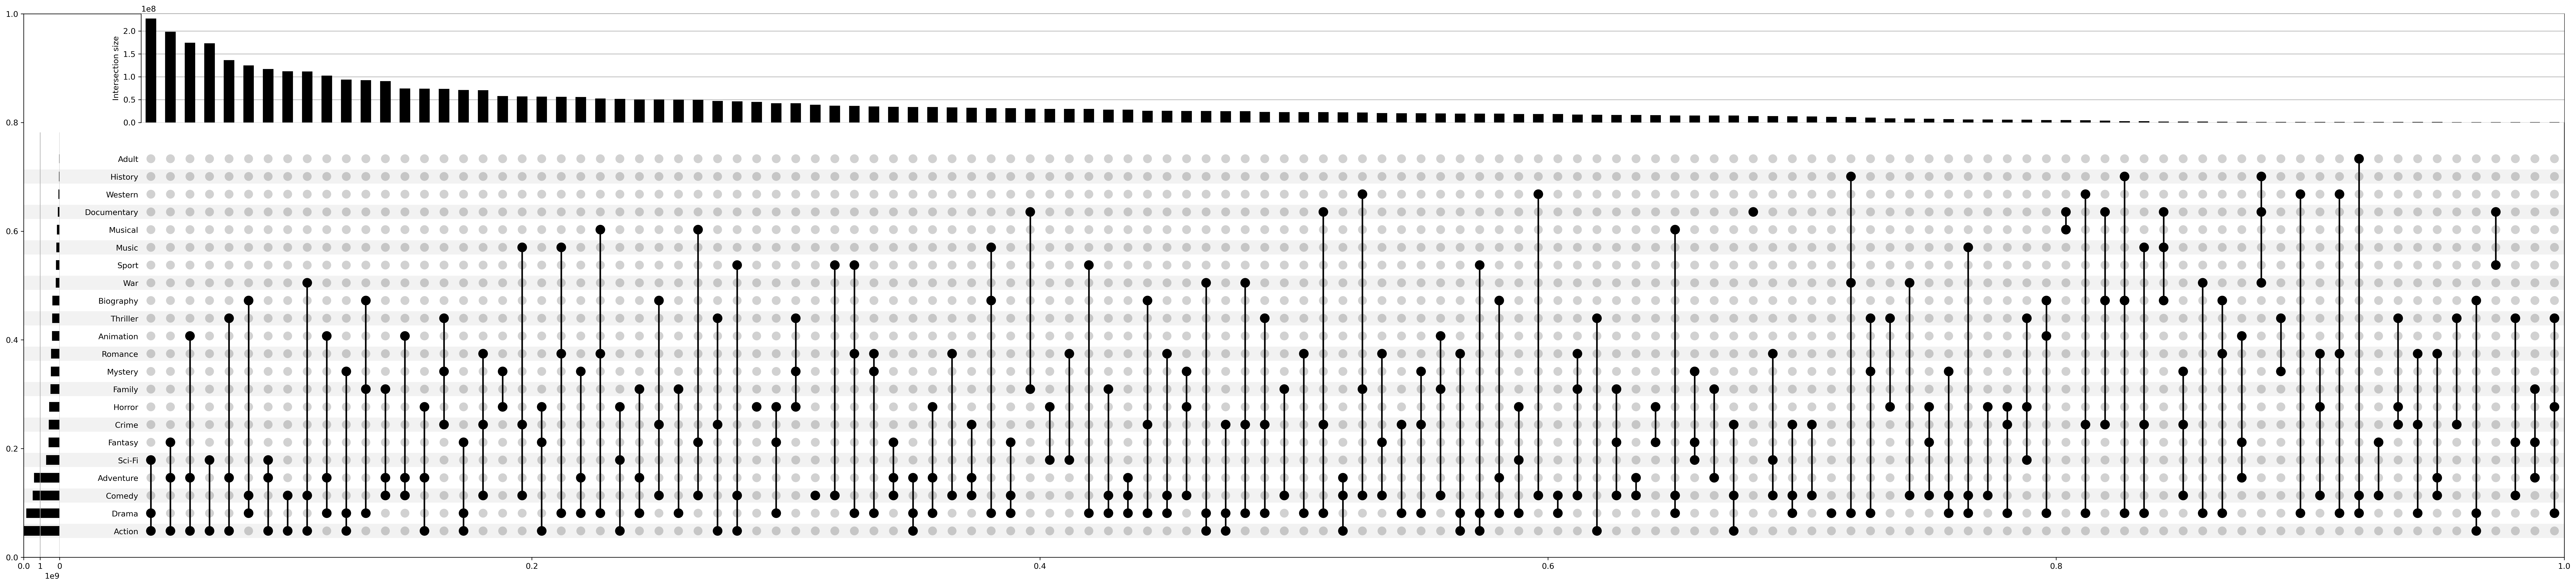

In [11]:
movie_genre_intersection_data = uplt.from_memberships(
    genres_list,
    data = genre_values
)

fig, ax = plt.subplots(1,1, figsize=(3,4), facecolor='white', dpi=300)
upset_plot = uplt.plot(movie_genre_intersection_data, fig=fig, orientation='horizontal', sort_by='cardinality',
                      sort_categories_by='cardinality', subset_size='sum', sum_over=None, facecolor='black')
plt.savefig("Movie_genre_upset_plot.svg")

In [12]:
#genre_values

In [13]:
min(genre_values)

3434.0

In [14]:
max(genre_values)

226277068.0

# Pie Chart

In [15]:
labels = []
for i in genres_list:
    labels.append("-".join(i))
#labels

In [16]:
pie_tuple = []
for x,y in zip(genre_values, labels):
    pie_tuple.append((x,y))

pie_tuple.sort(reverse=True)
#pie_tuple

In [17]:
labels = []
sizes = []
# Getting Top 10
for i in range(10):
    labels.append(pie_tuple[i][1])
    sizes.append(pie_tuple[i][0])

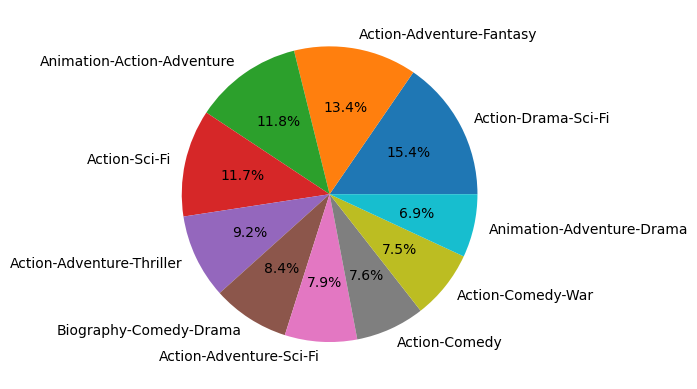

In [18]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig("Top_10_Genres_Groupings_Pie_Chart.svg")